# PROJECT NAME : COFFEE_CONNECT ☕

**OBJECTIVE: ANALYZE COFFEE SALES DATA TO EXTRACT REVENUE INSIGHTS, PRODUCT PERFORMANCE AND SHOP-LEVEL METRICS USING PYTHON AND PANDAS**

## Problem Statement

CoffeeConnect – Data-Driven Insights for Café Chain Expansion
CoffeeConnect is a rapidly growing café chain that specializes in premium coffee offerings
across urban centers in India. The company has installed a modern POS (Point-of-Sale) system
in all its outlets to track customer purchases, payment methods, and sales patterns.


To make strategic decisions around: 
● inventory, 
● marketing campaigns, 
● staffing shifts, 
● and potential city-wise expansion, 
CoffeeConnect has asked you, a Data Analyst Intern, to analyze two months of transaction-level 
data collected across their outlets. 
You’ve been given two CSV files: 
1. index_1.csv – Transactions from February 
2. index_2.csv – Transactions from March


**Data Dictionary**

**Datetime** -  Exact timestamp of the transaction  

**Card** - Anonymized card ID of the customer

**coffee_name** - Name of the coffee purchased

**Cash_type** - Payment method (cash/card/UPI) 

**Money** - Amount spent

**Date** - Derived from datetime


## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import statistics as sn
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Preparation


In [3]:
data1=pd.read_csv("index_1.csv")
data1.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data2=pd.read_csv("index_2.csv")
data2.head(5)

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


## 3. Understand the Data

In [11]:
# Combine both months
df = pd.concat([data1,data2])
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [196]:
df.describe

<bound method NDFrame.describe of             date                datetime cash_type                 card  \
0     2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                     ...       ...                  ...   
3631  2025-03-23 2025-03-23 10:34:54.894      card  ANON-0000-0000-1158   
3632  2025-03-23 2025-03-23 14:43:37.362      card  ANON-0000-0000-1315   
3633  2025-03-23 2025-03-23 14:44:16.864      card  ANON-0000-0000-1315   
3634  2025-03-23 2025-03-23 15:47:28.723      card  ANON-0000-0000-1316   
3635  2025-03-23 2025-03-23 18:11:38.635      card  ANON-0000-0000-1275   

      money    coffee_name  hour  month  
0     38.70          La

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3898 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 213.2+ KB


In [36]:
# List of categorical columns
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [37]:
# Shape and size of the dataset
df.shape
df.size

21816

In [28]:
print(df['datetime'].head(10)) #inspect the column

0    2024-03-01 10:15:50.520
1    2024-03-01 12:19:22.539
2    2024-03-01 12:20:18.089
3    2024-03-01 13:46:33.006
4    2024-03-01 13:48:14.626
5    2024-03-01 15:39:47.726
6    2024-03-01 16:19:02.756
7    2024-03-01 18:39:03.580
8    2024-03-01 19:22:01.762
9    2024-03-01 19:23:15.887
Name: datetime, dtype: object


In [171]:
# Convert datetime column to proper format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows where datetime conversion failed
df = df.dropna(subset=['datetime'])

# Extract hour from datetime
df['hour'] = df['datetime'].dt.hour

df['hour'].head(5)

0    10
1    12
2    12
3    13
4    13
Name: hour, dtype: int32

In [32]:
print(df['datetime'].isna().sum())


262



## 4 Exploratory Data Analysis

#### 1. Customer Behavior: 
    ○ Which coffees are most popular? 
    ○ Do people prefer card, cash, or UPI? 
    ○ At what time of the day are people most likely to buy coffee?

In [17]:
# Count coffee purchases (find the most populer coffees)
popular_coffees = df['coffee_name'].value_counts().reset_index()
popular_coffees.columns = ['coffee_name', 'purchase_count']
print(popular_coffees)

                   coffee_name  purchase_count
0          Americano with Milk             824
1                        Latte             806
2                    Americano             593
3                   Cappuccino             517
4                      Cortado             292
5                Hot Chocolate             282
6                        Cocoa             243
7                     Espresso             152
8          Americano with milk              44
9                Irish whiskey              21
10   Coffee with Irish whiskey              16
11                         Tea              16
12     Irish whiskey with milk              15
13        Double Irish whiskey              12
14         Chocolate with milk              12
15  Caramel with Irish whiskey               8
16             Super chocolate               6
17       Chocolate with coffee               5
18                  Mochaccino               5
19        Irish with chocolate               5
20      Caram

In [18]:
# Count payment types (finds payment method)
payment_counts = df['cash_type'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'transaction_count']
print(payment_counts)

  payment_method  transaction_count
0           card               3729
1           cash                169


In [65]:
 # Peak coffee buying time (Count transactions per hour)

hourly_sales = df['hour'].value_counts().sort_index().reset_index()
hourly_sales.columns = ['hour_of_day', 'transaction_count']
print(hourly_sales)

    hour_of_day  transaction_count
0             6                  5
1             7                 91
2             8                235
3             9                247
4            10                349
5            11                294
6            12                249
7            13                227
8            14                228
9            15                245
10           16                283
11           17                244
12           18                220
13           19                235
14           20                171
15           21                197
16           22                116


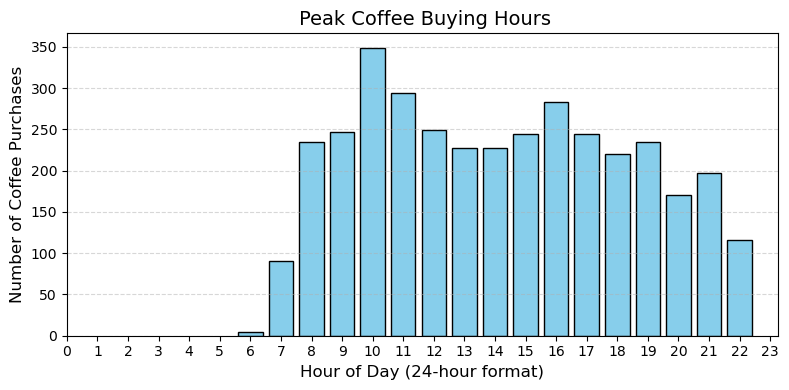

In [66]:

plt.figure(figsize=(8, 4))
plt.bar(hourly_sales['hour_of_day'], hourly_sales['transaction_count'], color='skyblue', edgecolor='black')

plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Coffee Purchases', fontsize=12)
plt.title(' Peak Coffee Buying Hours', fontsize=14)
plt.xticks(range(0, 24))  # Show all 24 hours
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



### 2. Sales Analysis: 
    ○ Which coffee earns the most revenue? 
    ○ What is the average ticket size for different coffees? 
    ○ How do daily sales vary over time?

***coffee earns the most revenue***

In [169]:
# Ensure price is numeric
df['money'] = pd.to_numeric(df['money'], errors='coerce')
df.head(5)

,date,datetime,cash_type,card,money,coffee_name,hour,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,March
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,March
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,March
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,March
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,March


In [73]:
total_revenue = df['money'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 115431.58


In [74]:
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().reset_index()
revenue_by_coffee.columns = ['coffee_name', 'total_revenue']
print(revenue_by_coffee)


           coffee_name  total_revenue
0            Americano       15062.26
1  Americano with Milk       25269.12
2           Cappuccino       18034.14
3                Cocoa        8678.16
4              Cortado        7534.86
5             Espresso        2814.28
6        Hot Chocolate       10172.46
7                Latte       27866.30


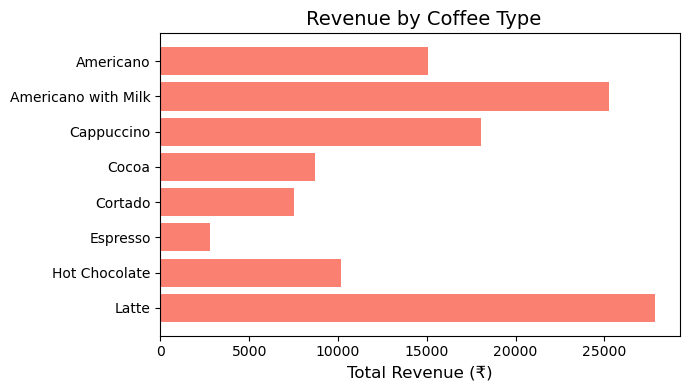

In [79]:
plt.figure(figsize=(7, 4))
plt.barh(revenue_by_coffee['coffee_name'], revenue_by_coffee['total_revenue'], color='salmon')
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.title(' Revenue by Coffee Type', fontsize=14)
plt.gca().invert_yaxis()  # Highest revenue on top
plt.tight_layout()
plt.show()

***Average ticket size for different coffee***

In [82]:
# Group by coffee and calculate average price
avg_ticket_size = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False).reset_index()
print(avg_ticket_size)

           coffee_name      money
0        Hot Chocolate  36.072553
1           Cappuccino  35.996287
2                Cocoa  35.712593
3                Latte  35.634655
4  Americano with Milk  30.666408
5            Americano  26.059273
6              Cortado  25.804315
7             Espresso  21.002090


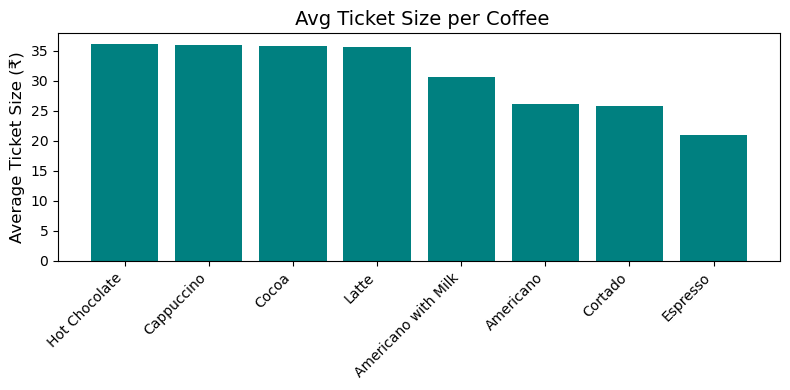

In [81]:
# Plot
plt.figure(figsize=(8, 4))
plt.bar(avg_ticket_size['coffee_name'], avg_ticket_size['money'], color='teal')
plt.ylabel('Average Ticket Size (₹)', fontsize=12)
plt.title(' Avg Ticket Size per Coffee', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


***Daily sales over time***

In [84]:
# Extract date
df['date'] = df['datetime'].dt.date

# Group by date and sum sales
daily_sales = df.groupby('date')['money'].sum().reset_index()
print(daily_sales)

           date   money
0    2024-03-01  396.30
1    2024-03-02  228.10
2    2024-03-03  349.10
3    2024-03-04  135.20
4    2024-03-05  338.50
..          ...     ...
376  2025-03-19  623.56
377  2025-03-20  597.60
378  2025-03-21  636.80
379  2025-03-22  365.42
380  2025-03-23  204.76

[381 rows x 2 columns]


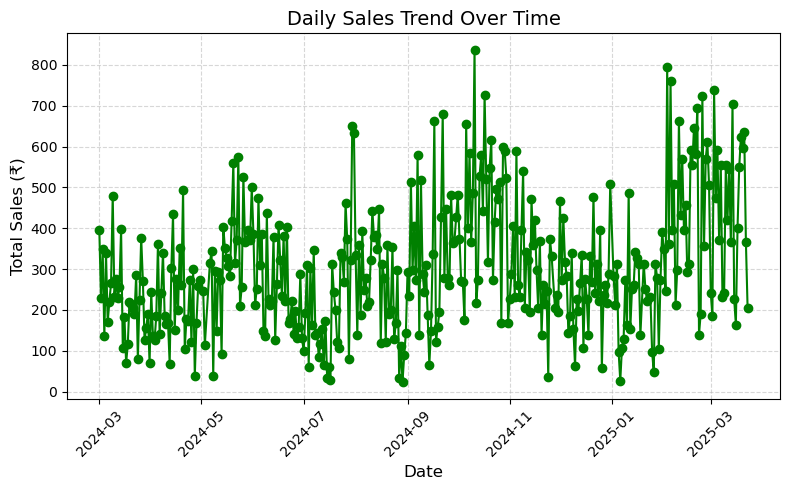

In [90]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(daily_sales['date'], daily_sales['money'], marker='o', color='green')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.title('Daily Sales Trend Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Operational Insights: 
    ○ Are there peak hours for transactions? 
    ○ Which outlets or cards have frequent repeat customers? 
    ○ Is there a noticeable difference in customer behavior between February and March? 

***Peak hours for transaction***

In [93]:
# Count transactions per hour
hourly_counts = df['hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['hour', 'transaction_count']
print(hourly_counts)


    hour  transaction_count
0      6                  5
1      7                 91
2      8                235
3      9                247
4     10                349
5     11                294
6     12                249
7     13                227
8     14                228
9     15                245
10    16                283
11    17                244
12    18                220
13    19                235
14    20                171
15    21                197
16    22                116


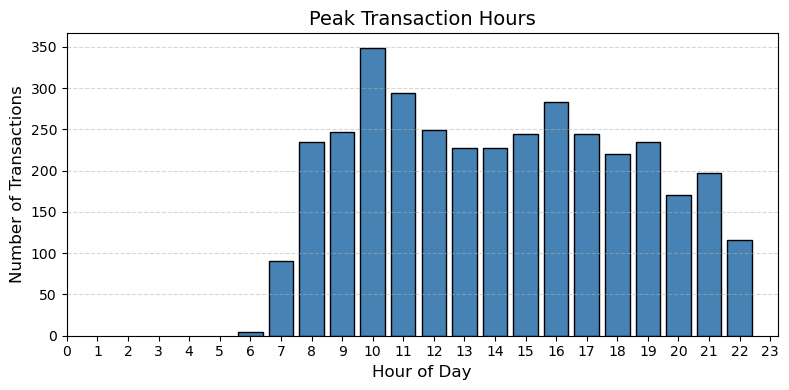

In [99]:
# Plot
plt.figure(figsize=(8,4))
plt.bar(hourly_counts['hour'], hourly_counts['transaction_count'], color='steelblue', edgecolor='black')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Peak Transaction Hours', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

***Outlets or cards have frequent repeat customers***

In [100]:
# Count repeat customers by card number
repeat_cards = df['card'].value_counts()
repeat_customers = repeat_cards[repeat_cards > 1].reset_index()
repeat_customers.columns = ['card_number', 'transaction_count']
print(repeat_customers)

             card_number  transaction_count
0    ANON-0000-0000-0012                129
1    ANON-0000-0000-0141                108
2    ANON-0000-0000-1163                 77
3    ANON-0000-0000-0276                 69
4    ANON-0000-0000-0009                 67
..                   ...                ...
540  ANON-0000-0000-0585                  2
541  ANON-0000-0000-0586                  2
542  ANON-0000-0000-0588                  2
543  ANON-0000-0000-0026                  2
544  ANON-0000-0000-0008                  2

[545 rows x 2 columns]


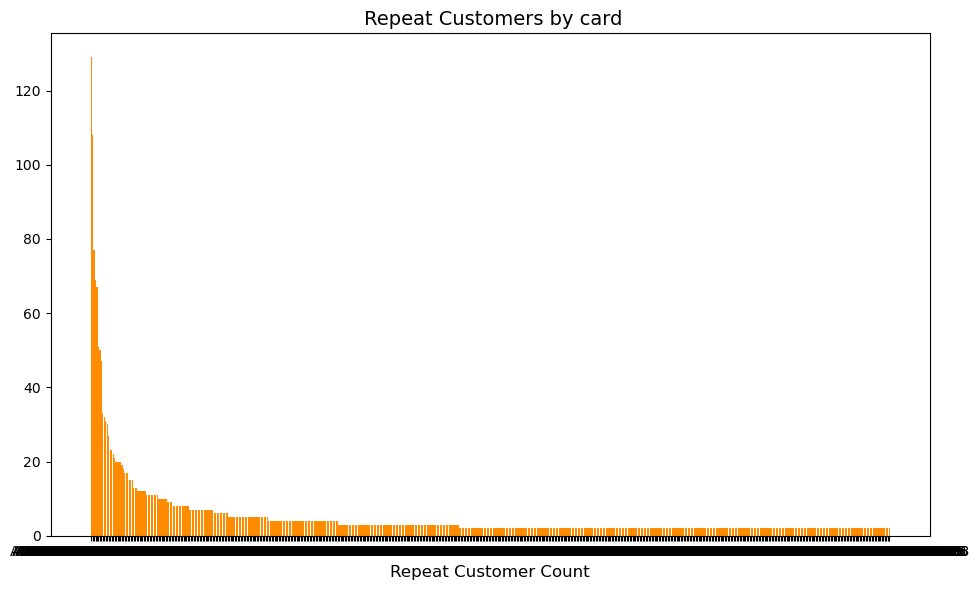

In [109]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(repeat_customers['card_number'], repeat_customers['transaction_count'],color='darkorange')
plt.xlabel('Repeat Customer Count', fontsize=12)
plt.title(' Repeat Customers by card', fontsize=14)
plt.tight_layout()
plt.show()


***Noticeable difference in customer behavior between February and March***

In [107]:
# Add month column
df['month'] = df['datetime'].dt.month_name()

# Compare transaction volume
monthly_volume = df['month'].value_counts().reset_index()
monthly_volume.columns = ['month', 'transaction_count']
print(monthly_volume)


        month  transaction_count
0       March                525
1     October                426
2    February                423
3   September                344
4      August                272
5         May                267
6    December                259
7    November                259
8        July                237
9        June                227
10    January                201
11      April                196


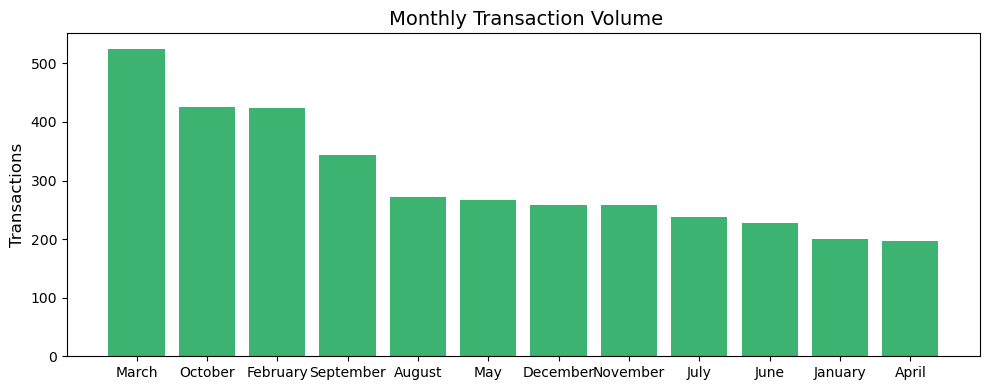

In [111]:
# Plot transaction volume
plt.figure(figsize=(10, 4))
plt.bar(monthly_volume['month'], monthly_volume['transaction_count'], color='mediumseagreen')
plt.ylabel('Transactions', fontsize=12)
plt.title(' Monthly Transaction Volume', fontsize=14)
plt.tight_layout()
plt.show()


In [108]:

# Compare average price
monthly_avg_price = df.groupby('month')['money'].mean().reset_index()
monthly_avg_price.columns = ['month', 'avg_ticket_size']
print(monthly_avg_price)

        month  avg_ticket_size
0       April        34.288571
1      August        27.992059
2    December        31.805946
3    February        31.242270
4     January        31.835124
5        July        29.181181
6        June        34.179559
7       March        32.450743
8         May        33.945393
9    November        33.168108
10    October        32.608357
11  September        29.036744


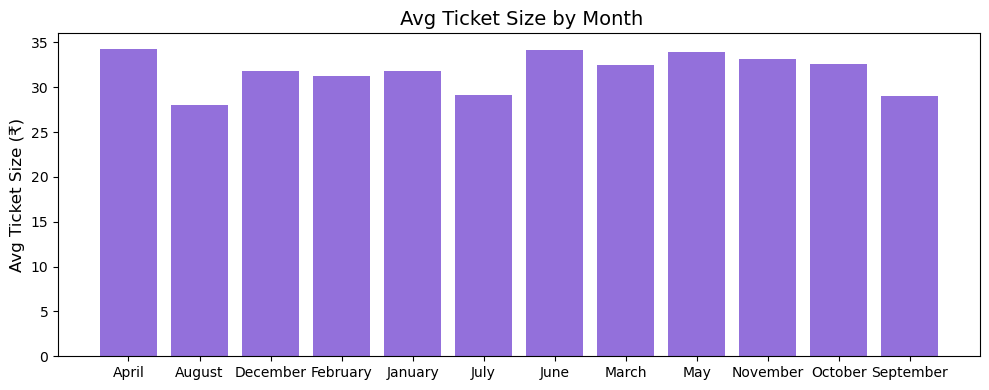

In [117]:
# Plot average ticket size
plt.figure(figsize=(10, 4))
plt.bar(monthly_avg_price['month'], monthly_avg_price['avg_ticket_size'], color='mediumpurple')
plt.ylabel('Avg Ticket Size (₹)', fontsize=12)
plt.title(' Avg Ticket Size by Month', fontsize=14)
plt.tight_layout()
plt.show()

### 4. Cross-Month Comparison: 
    ○ Combine both months and analyze growth trends. 
    ○ Track changes in payment preferences. 
    ○ Compare sales of specific coffees month-over-month. 

***Combine both months and analyze growth trends***

In [118]:
# Total revenue and transaction count per month
monthly_summary = df.groupby('month').agg(total_revenue=('money','sum'),transaction_count=('money','count'),
                                          avg_ticket_size=('money','mean')).reset_index()
print(monthly_summary)

        month  total_revenue  transaction_count  avg_ticket_size
0       April        6720.56                196        34.288571
1      August        7613.84                272        27.992059
2    December        8237.74                259        31.805946
3    February       13215.48                423        31.242270
4     January        6398.86                201        31.835124
5        July        6915.94                237        29.181181
6        June        7758.76                227        34.179559
7       March       17036.64                525        32.450743
8         May        9063.42                267        33.945393
9    November        8590.54                259        33.168108
10    October       13891.16                426        32.608357
11  September        9988.64                344        29.036744


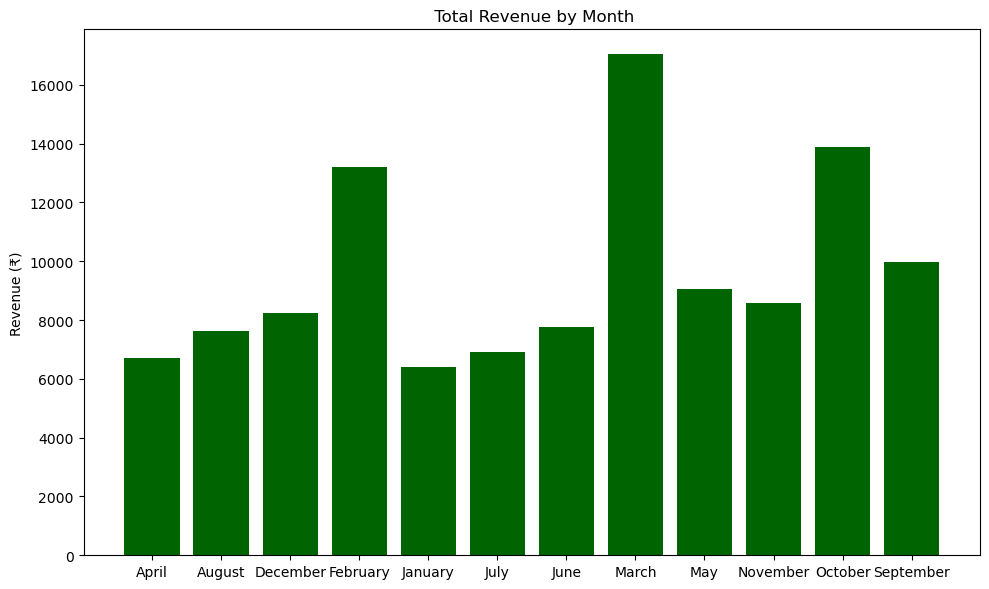

In [121]:
# Plot revenue
plt.figure(figsize=(10, 6))
plt.bar(monthly_summary['month'], monthly_summary['total_revenue'], color='darkgreen')
plt.title(' Total Revenue by Month')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()


***Track changes in payment preferences***

In [124]:
# Count payment types per month
payment_trends = df.groupby(['month', 'cash_type']).size().unstack(fill_value=0)
print(payment_trends)

cash_type  card  cash
month                
April       168    28
August      272     0
December    259     0
February    423     0
January     201     0
July        237     0
June        223     4
March       494    31
May         241    26
November    259     0
October     426     0
September   344     0


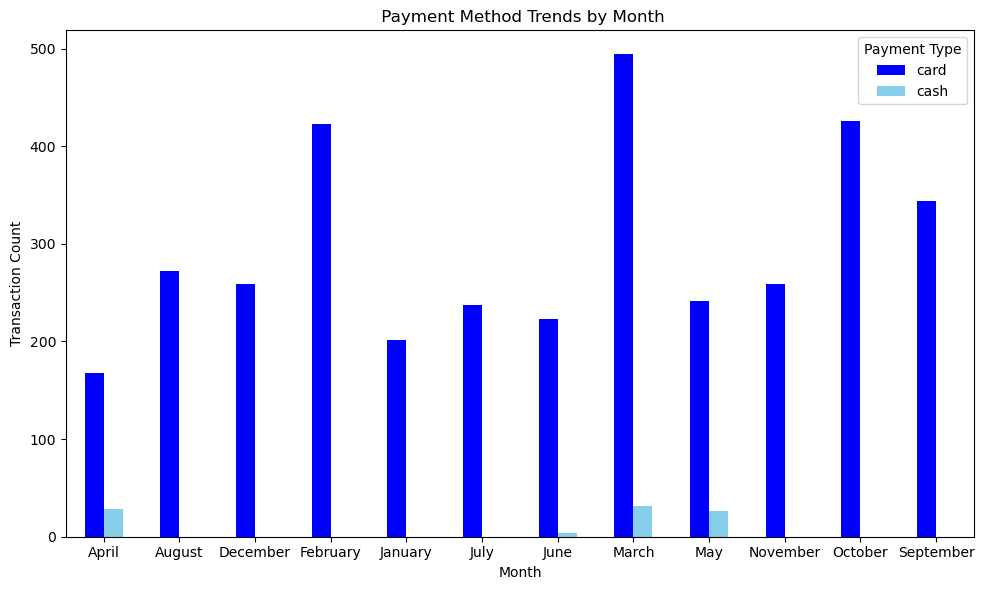

In [130]:
# Plot grouped bar chart
payment_trends.plot(kind='bar', figsize=(10,6), color=['blue', 'skyblue', 'salmon'])
plt.title(' Payment Method Trends by Month')
plt.ylabel('Transaction Count')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.legend(title='Payment Type')
plt.tight_layout()
plt.show()

***Compare sales of specific coffees month-over-month***

In [132]:
# Group by coffee and month
coffee_monthly_sales = df.groupby(['coffee_name', 'month'])['money'].sum().unstack(fill_value=0)
print(coffee_monthly_sales)

month                  April   August  December  February  January     July  \
coffee_name                                                                   
Americano            1001.94   851.74    700.92   3037.32   649.00   858.12   
Americano with Milk  1407.74  2010.24   1759.02   2623.10  1604.72  1863.80   
Cappuccino           1659.44  1115.88   1358.88   1859.52   965.52  1079.64   
Cocoa                 232.82   361.02    750.96   2002.56   500.64   300.28   
Cortado               548.48   920.80    804.76    259.60   571.12   322.28   
Espresso              171.00   253.68    252.72    358.02   105.30   273.28   
Hot Chocolate         506.02   196.92    929.76   1144.32   536.40   361.02   
Latte                1193.12  1903.56   1680.72   1931.04  1466.16  1857.52   

month                   June    March      May  November  October  September  
coffee_name                                                                   
Americano             390.88  3692.72  1348.80    6

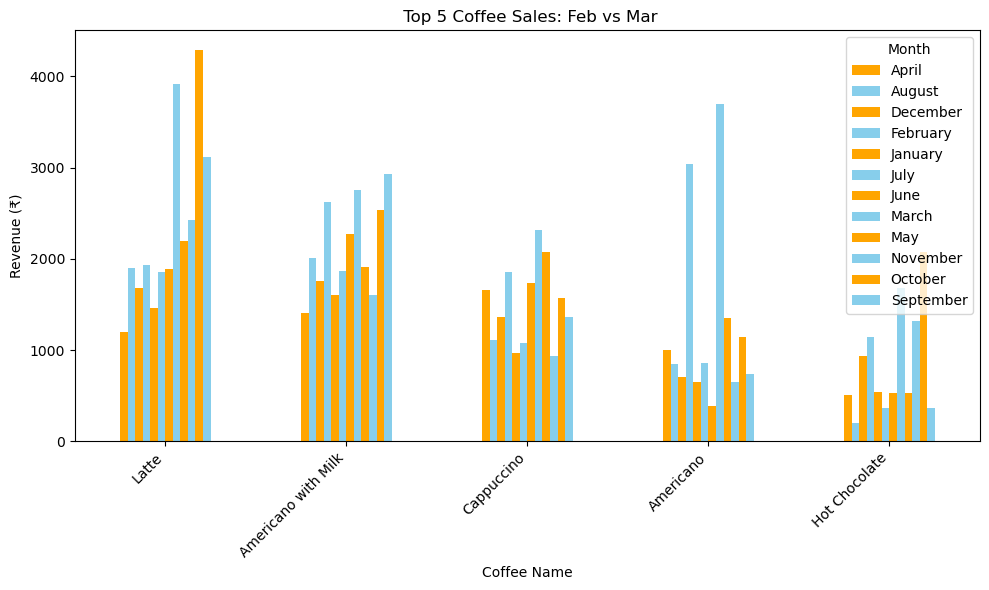

In [133]:
# Plot top 5 coffees by total revenue
top_coffees = coffee_monthly_sales.sum(axis=1).sort_values(ascending=False).head(5)
top_coffee_sales = coffee_monthly_sales.loc[top_coffees.index]

top_coffee_sales.plot(kind='bar', figsize=(10, 6), color=['orange', 'skyblue'])
plt.title(' Top 5 Coffee Sales: Feb vs Mar')
plt.ylabel('Revenue (₹)')
plt.xlabel('Coffee Name')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

### Extra Exercise: 
    Basic Slicing & Filtering 
    1. Display all rows where money > 30 in index_1.csv. 
    2. Filter transactions from index_1.csv made with cash_type = 'card'. 
    3. Find rows in index_2.csv where coffee_name is either 'Latte' or 'Americano'. 
    4. Retrieve all records from index_1.csv where datetime is after "2024-03-01 12:00:00". 
    5. Find the first 5 transactions of card = 'ANON-0000-0000-0002' from index_1.csv. 

In [144]:
# 1. Display all rows where money > 30 in index_1.csv. 
d1=data1[data1['money'] > 30]
d1.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk
10,2024-03-01,2024-03-01 19:29:17.391,card,ANON-0000-0000-0009,33.8,Americano with Milk


In [147]:
# 2. Filter transactions from index_1.csv made with cash_type = 'card'. 
d2=data1[data1['cash_type'] == 'card']
d2.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [146]:
# 3. Find rows in index_2.csv where coffee_name is either 'Latte' or 'Americano'. 
d3=data2[data2['coffee_name'].isin(['Latte', 'Americano'])]
d3.head(10)


,date,datetime,cash_type,money,coffee_name
17,2025-02-09,2025-02-09 16:25:15,card,33.0,Latte
18,2025-02-09,2025-02-09 17:47:17,card,33.0,Latte
20,2025-02-09,2025-02-09 18:01:22,card,33.0,Latte
24,2025-02-10,2025-02-10 09:26:07,cash,25.0,Americano
25,2025-02-10,2025-02-10 12:26:32,cash,25.0,Americano
28,2025-02-11,2025-02-11 18:35:30,card,25.0,Americano
30,2025-02-13,2025-02-13 07:55:09,card,33.0,Latte
43,2025-02-15,2025-02-15 09:38:59,card,25.0,Americano
50,2025-02-16,2025-02-16 16:36:54,card,33.0,Latte
54,2025-02-16,2025-02-16 19:30:33,card,33.0,Latte


In [148]:
# 4. Retrieve all records from index_1.csv where datetime is after "2024-03-01 12:00:00". 
d4=data1['datetime'] = pd.to_datetime(data1['datetime'], errors='coerce')

d4=data1[data1['datetime'] >= '2024-03-01 12:00:00']
d4.head(10)

,date,datetime,cash_type,card,money,coffee_name
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk
10,2024-03-01,2024-03-01 19:29:17.391,card,ANON-0000-0000-0009,33.8,Americano with Milk


In [153]:
# 5. Find the first 5 transactions of card = 'ANON-0000-0000-0002' from index_1.csv. 
d5=data1[data1['card'] == 'ANON-0000-0000-0002']
d5.head(5)

,date,datetime,cash_type,card,money,coffee_name
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


### Grouping & Aggregations 
    6. Group both datasets by coffee_name and find the total money collected per item. 
    7. Count the number of transactions per cash_type in both datasets. 
    8. Find the average money spent per coffee_name in index_1.csv. 
    9. Which coffee earned the highest total revenue in index_2.csv? 

In [156]:
# 6. Group both datasets by coffee_name and find the total money collected per item. 
# Group by coffee_name and sum money
total_revenue1 = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).reset_index()
total_revenue1.head(5)

,coffee_name,money
0,Latte,27866.30
1,Americano with Milk,25269.12
2,Cappuccino,18034.14
3,Americano,15062.26
4,Hot Chocolate,10172.46


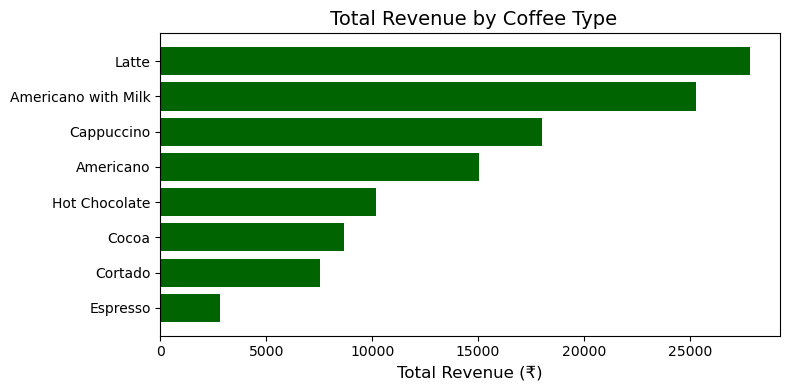

In [160]:
# Plot
plt.figure(figsize=(8, 4))
plt.barh(total_revenue1['coffee_name'], total_revenue1['money'], color='darkgreen')
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.title(' Total Revenue by Coffee Type', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [161]:
# 7. Count the number of transactions per cash_type in both datasets. 
# Count transactions per payment method
payment_counts1 = df['cash_type'].value_counts().reset_index()
payment_counts1.columns = ['cash_type', 'transaction_count']
payment_counts1.head(5)

,cash_type,transaction_count
0,card,3547
1,cash,89


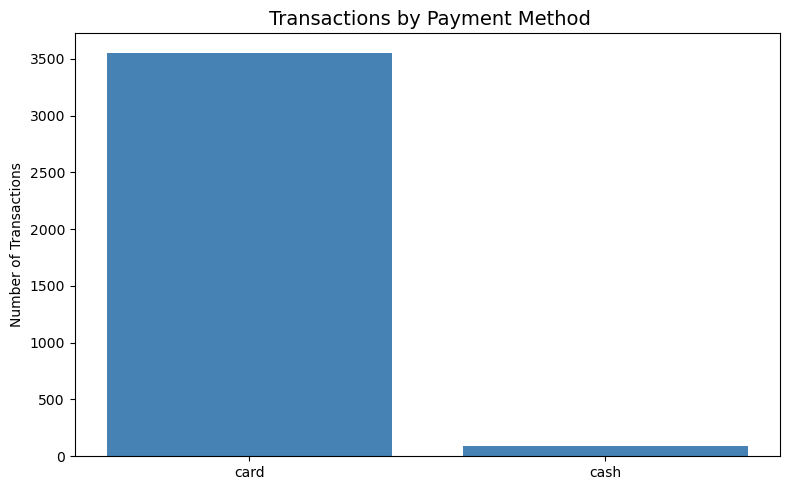

In [162]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(payment_counts1['cash_type'], payment_counts1['transaction_count'], color='steelblue')
plt.title(' Transactions by Payment Method', fontsize=14)
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [164]:
# 8. Find the average money spent per coffee_name in index_1.csv. 
# Group by coffee_name and calculate average money
avg_spend_feb = data1.groupby('coffee_name')['money'].mean().sort_values(ascending=False).reset_index()
avg_spend_feb.head(5)


,coffee_name,money
0,Hot Chocolate,36.072553
1,Cappuccino,35.996287
2,Cocoa,35.712593
3,Latte,35.634655
4,Americano with Milk,30.666408


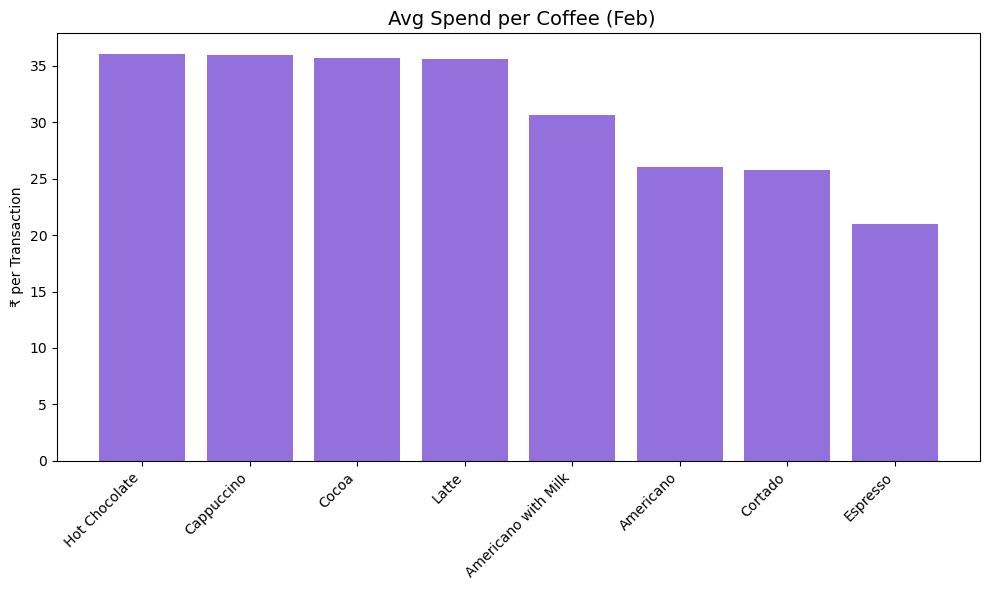

In [165]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(avg_spend_feb['coffee_name'], avg_spend_feb['money'], color='mediumpurple')
plt.title(' Avg Spend per Coffee (Feb)', fontsize=14)
plt.ylabel('₹ per Transaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [167]:
# 9. Which coffee earned the highest total revenue in index_2.csv? 
# Group by coffee_name and sum money
revenue_march = data2.groupby('coffee_name')['money'].sum().sort_values(ascending=False).reset_index()
revenue_march.head(5)


,coffee_name,money
0,Americano with milk,1100.0
1,Latte,792.0
2,Irish whiskey,525.0
3,Cappuccino,480.0
4,Coffee with Irish whiskey,464.0


In [168]:
# Display top coffee
top_coffee = revenue_march.iloc[0]
print(f" Highest Revenue Coffee in March: {top_coffee['coffee_name']} (₹{top_coffee['money']:.2f})")


 Highest Revenue Coffee in March: Americano with milk (₹1100.00)


### Merging / Joining 
    10. Create a new DataFrame with only card and money columns from both files and merge 
    them using outer join on card.
    11. Merge index_1.csv and index_2.csv using inner join on coffee_name. How many records do 
    you get? 
    12. After merging on coffee_name, calculate total money per coffee_name. 

In [192]:
# 10. Create a new DataFrame with only card and money columns from both files and merge them using outer join on card.

# Select relevant columns
df1_subset = data1[['cash_type', 'money']].copy()
df2_subset = data2[['cash_type', 'money']].copy()

# Rename columns to distinguish months
df1_subset.rename(columns={'money': 'money_feb'}, inplace=True)
df2_subset.rename(columns={'money': 'money_mar'}, inplace=True)

# Outer join on 'card'
merged_cards = pd.merge(df1_subset, df2_subset, on='cash_type', how='outer')

print(merged_cards.head())


  cash_type  money_feb  money_mar
0      card       38.7       20.0
1      card       38.7       30.0
2      card       38.7       33.0
3      card       38.7       28.0
4      card       38.7       20.0


In [194]:
# 11. Merge index_1.csv and index_2.csv using inner join on coffee_name. How many records do you get? 
 
# Inner join on coffee_name
merged_coffee = pd.merge(data1, data2, on='coffee_name', how='inner')

# Count number of records
print("Number of records after inner join:", merged_coffee.shape[0])


Number of records after inner join: 37866


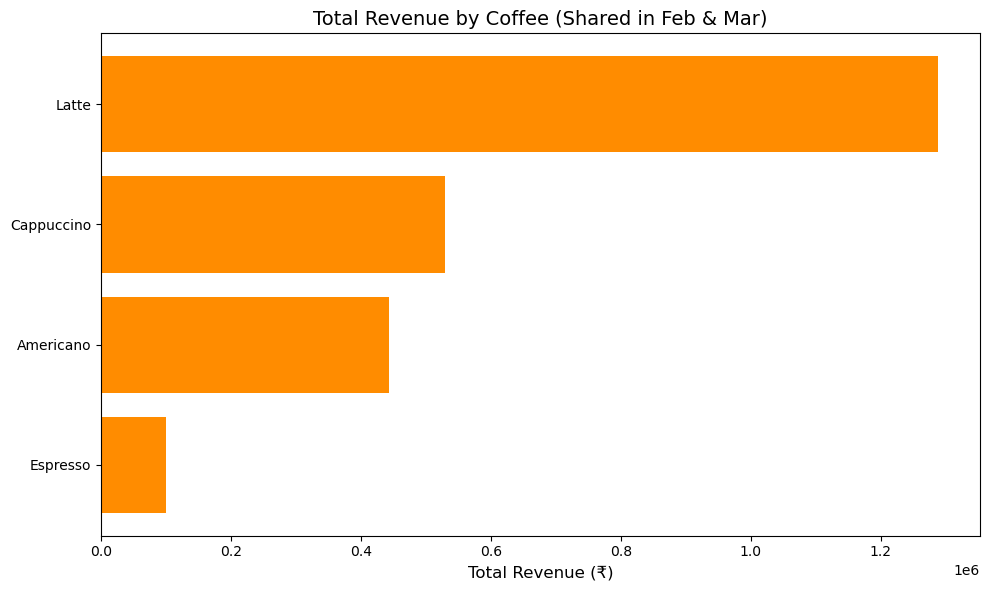

In [195]:
# 12. After merging on coffee_name, calculate total money per coffee_name.
# Sum money from both months after merge
merged_coffee['total_money'] = merged_coffee['money_x'] + merged_coffee['money_y']

# Group by coffee_name and sum total_money
total_money_by_coffee = merged_coffee.groupby('coffee_name')['total_money'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(total_money_by_coffee['coffee_name'], total_money_by_coffee['total_money'], color='darkorange')
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.title('Total Revenue by Coffee (Shared in Feb & Mar)', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Analysis-Based 
    13. Combine both datasets and find the total revenue per date. 
    14. From the combined data, identify the most frequently purchased coffee. 
    15. How many unique cards made more than one purchase? 
    16. From the combined data, add a column for hour and count transactions by hour of day. 
    17. Plot a bar chart of total revenue per coffee_name using Seaborn. 
    18. Plot a line chart showing total daily sales from combined dataset.

In [185]:
# 13. Combine both datasets and find the total revenue per date. 
# Extract date
df['date'] = df['datetime'].dt.date

# Group by date and sum money
daily_revenue = df.groupby('date')['money'].sum().reset_index()
print(daily_revenue.head())


         date  money
0  2024-03-01  396.3
1  2024-03-02  228.1
2  2024-03-03  349.1
3  2024-03-04  135.2
4  2024-03-05  338.5


In [183]:
# 14. From the combined data, identify the most frequently purchased coffee. 
# Count coffee_name frequency
top_coffee = df['coffee_name'].value_counts().reset_index()
top_coffee.columns = ['coffee_name', 'purchase_count']
print("Most frequently purchased coffee:", top_coffee.iloc[0]['coffee_name'])


Most frequently purchased coffee: Americano with Milk


In [182]:
# 15. How many unique cards made more than one purchase? 
# Count purchases per card
card_counts = df['card'].value_counts()
repeat_cards = card_counts[card_counts > 1]
print("Unique cards with >1 purchase:", repeat_cards.count())


Unique cards with >1 purchase: 545


In [181]:
# 16. From the combined data, add a column for hour and count transactions by hour of day. 
# Extract hour
df['hour'] = df['datetime'].dt.hour

# Count transactions per hour
hourly_counts = df['hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['hour', 'transaction_count']
print(hourly_counts)


    hour  transaction_count
0      6                  5
1      7                 91
2      8                235
3      9                247
4     10                349
5     11                294
6     12                249
7     13                227
8     14                228
9     15                245
10    16                283
11    17                244
12    18                220
13    19                235
14    20                171
15    21                197
16    22                116


C:\Users\USER\AppData\Local\Temp\ipykernel_13984\3653707271.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_coffee, x='money', y='coffee_name', palette='viridis')


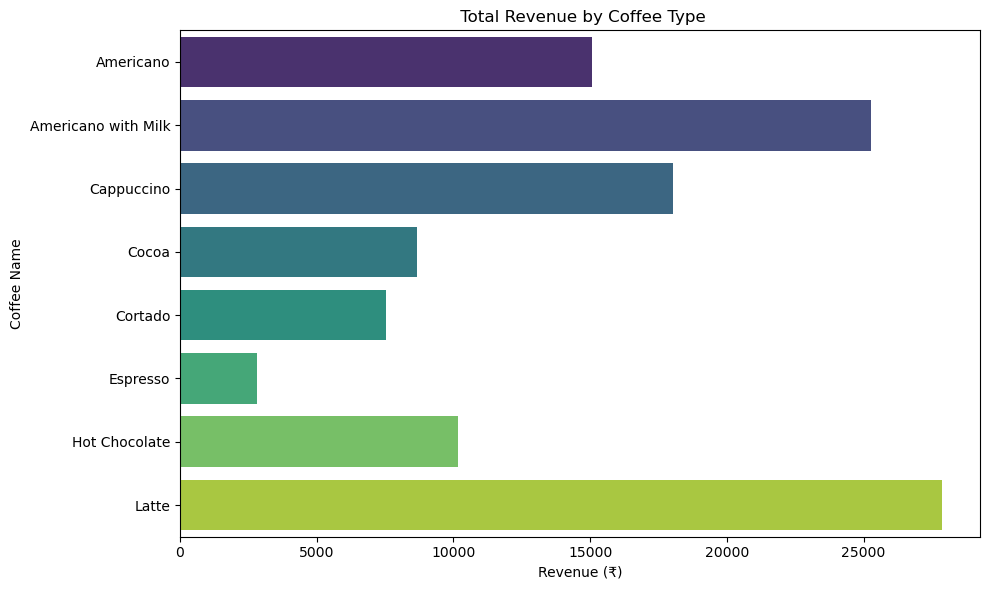

In [180]:
# 17. Plot a bar chart of total revenue per coffee_name using Seaborn. 
# Group by coffee_name and sum money
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().reset_index()

# Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_coffee, x='money', y='coffee_name', palette='viridis')
plt.title(' Total Revenue by Coffee Type')
plt.xlabel('Revenue (₹)')
plt.ylabel('Coffee Name')
plt.tight_layout()
plt.show()


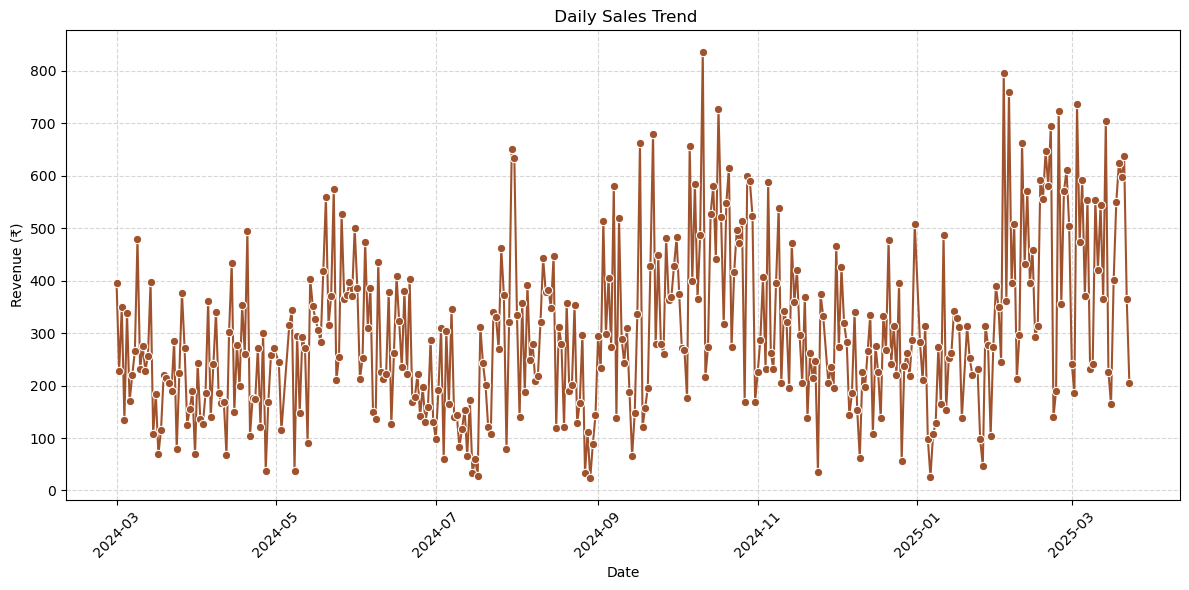

In [186]:
# 18. Plot a line chart showing total daily sales from combined dataset.
# Use daily_revenue from step 13
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_revenue, x='date', y='money', marker='o', color='sienna')
plt.title(' Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


 **CONCLUSION:** THIS ANALYSIS SUCCESSFULLY IDENTIFIED KEY SALES TRENDS,TOP-PERFORMING COFFEE PRODUCTS,AND OPERATIONAL INSIGHTS ACROSS COFFEE SHOPS.